# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [124]:
import pandas as pd
from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.spatial import distance
from google.colab import files
from IPython.display import Image


In [125]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [126]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [127]:
df = pd.read_csv(dataseturl)

## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [128]:
print(df.shape)

(200, 5)


Show summary statistics using `describe()`. `(5 pts)`

In [129]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [130]:
df.isnull()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [131]:
X = df[['AnnualIncome', 'SpendingScore']]


Display the first 10 rows. `(5 pts)`

In [132]:
X.head(10)

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

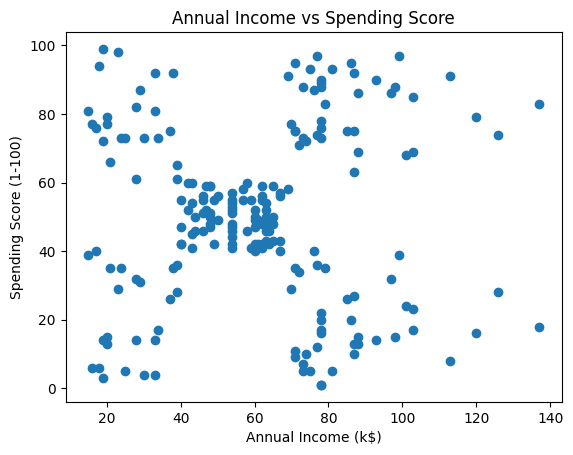

In [133]:
fig, ax = plt.subplots()
ax.scatter(X['AnnualIncome'], X['SpendingScore'])
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_title('Annual Income vs Spending Score')
plt.show()

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

WCSS for k = 1 is 269981.28000000014
WCSS for k = 2 is 181363.59595959607
WCSS for k = 3 is 106348.37306211119
WCSS for k = 4 is 73679.78903948837
WCSS for k = 5 is 44448.45544793369
WCSS for k = 6 is 37265.86520484345
WCSS for k = 7 is 30259.657207285458
WCSS for k = 8 is 25050.832307547524
WCSS for k = 9 is 21862.09267218289
WCSS for k = 10 is 19657.783608703947


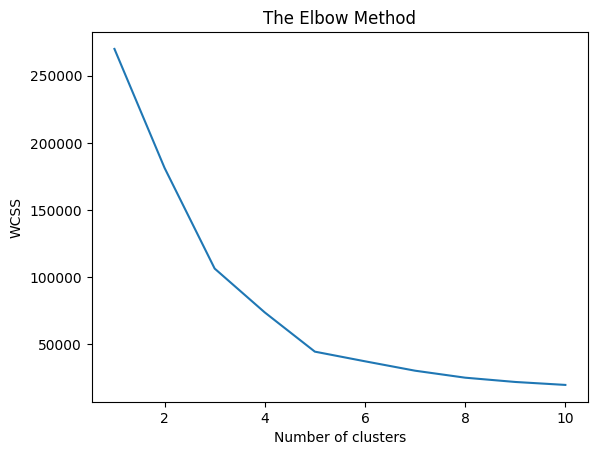

In [134]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print("WCSS for k = {} is {}".format(i,kmeans.inertia_))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [135]:
cluster_kmeans = KMeans(n_clusters = 5)
model = cluster_kmeans.fit(X)
labels = model.predict(X)
pred_kmeans = model.labels_
df['Cluster'] = labels
df.head(10)

print(pred_kmeans)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 1 2 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 3 0 1 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0 1 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

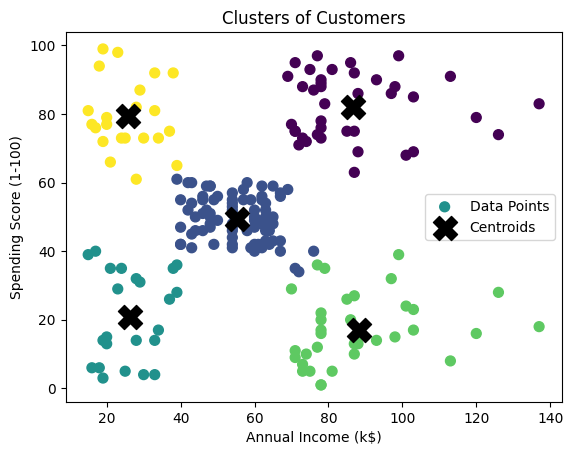

In [136]:
centroids = model.cluster_centers_
plt.scatter(X['AnnualIncome'], X['SpendingScore'], c=pred_kmeans, s=50, cmap='viridis', label='Data Points')
plt.scatter(centroids[:,0], centroids[:,1], s=300, c='black', marker='X', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users?
- Which cluster represents low income, high spending users?
- Which cluster might represent target customers for promotions?
- What business insights can you derive from the clusters?

In [137]:
"""
1. We can see that the yellow cluster above is the one with the low spending yet high income individuals
2. We can see that the green cluster above is the one with the high spending yet low income individuals
3. I think that would be solely for green cluster and dark blue cluster since they both pose a high spending data, therefore a valueable target for business promotions
4. 2 clusters are high spenders, and 2 are also low spenders, while 1 being the middle ground for both high/low spending which is cluster purple.
   The high spenders which are cluster green and dark blue should be the best option for business as they would be the likely consumers
   of their products/services.
"""

'\n1. We can see that the yellow cluster above is the one with the low spending yet high income individuals\n2. We can see that the green cluster above is the one with the high spending yet low income individuals\n3. I think that would be solely for green cluster and dark blue cluster since they both pose a high spending data, therefore a valueable target for business promotions\n4. 2 clusters are high spenders, and 2 are also low spenders, while 1 being the middle ground for both high/low spending which is cluster purple.\n   The high spenders which are cluster green and dark blue should be the best option for business as they would be the likely consumers\n   of their products/services.\n'

## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [138]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'
df = pd.read_csv(dataseturl)
X3D = df[['Age', 'AnnualIncome', 'SpendingScore']]

Visualize using a 3D scatter plot. `(5 pts)`

In [139]:
import plotly.express as px

fig = px.scatter_3d(df, 'Age', y='AnnualIncome', z='SpendingScore', color=pred_kmeans)
fig.show()

## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?
- What business insights can you derive from the clusters in 3D??

In [140]:
"""
1. Yes, there are 5 meaningful distinguishable clusters, which shows the individual age of each cluster and how a specific age group spend
   their income whilst having a specific annual income.
2. Yet again, those with high spending score can be the target consumers for business promotions. The cluster with the low income & high
   spending score shows that their age mostly ranges from their early 20's to late 30's, while the high income and high spending score
   of cluster shows that their age groups mostly ranges from their 40's to late 50's.
"""

"\n1. Yes, there are 5 meaningful distinguishable clusters, which shows the individual age of each cluster and how a specific age group spend\n   their income whilst having a specific annual income.\n2. Yet again, those with high spending score can be the target consumers for business promotions. The cluster with the low income & high\n   spending score shows that their age mostly ranges from their early 20's to late 30's, while the high income and high spending score\n   of cluster shows that their age groups mostly ranges from their 40's to late 50's.\n"